# Registration practical

In this practical we will register the functional scans to the structural scan, as well as the structural scan to the 'standard' MNI152 space.

In [15]:
import nipype
import nibabel as nb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [16]:
from nipype.workflows.fmri.fsl import create_reg_workflow
import nipype.interfaces.fsl as fsl

import nipype.pipeline.engine as pe
import nipype.interfaces.io as nio

In [17]:
registration = create_reg_workflow()
registration.base_dir = '/data/workflow_folders/'

In [18]:
registration.inputs.inputspec.target_image = fsl.Info.standard_image('MNI152_T1_2mm.nii.gz')
registration.inputs.inputspec.target_image_brain = fsl.Info.standard_image('MNI152_T1_2mm_brain.nii.gz')
registration.inputs.inputspec.config_file = 'T1_2_MNI152_2mm'

In [19]:
templates = {'mean_func':'/data/preprocessed_data/mean/_subject_id_{subject_id}/*.nii.gz',
            'struct':'/data/struct/ANAT_pp{subject_id}.nii',
            'func':'/data/preprocessed_data/highpassed_files/_subject_id_{subject_id}/_highpass*/pp*_B*_dtype_mcf_mask_gms_tempfilt.nii.gz'}

In [20]:
import glob
import os

subject_ids = [os.path.split(fn)[1][2:] for fn in glob.glob('/data/func_raw/*')]
subject_ids

['0498',
 '0544',
 '0538',
 '0553',
 '0552',
 '0197',
 '0549',
 '0551',
 '0559',
 '0558',
 '0471',
 '0483',
 '0554',
 '0548',
 '0523',
 '0372',
 '0381',
 '0555']

In [21]:
selector = pe.Node(nio.SelectFiles(templates), name='selector')

selector.iterables = [('subject_id', subject_ids)]

In [22]:
registration.connect(selector, 'mean_func', registration.get_node('inputspec'), 'mean_image')
registration.connect(selector, 'struct', registration.get_node('inputspec'), 'anatomical_image')
registration.connect(selector, 'func', registration.get_node('inputspec'), 'source_files')

registration.get_node('stripper').inputs

ds = pe.Node(nio.DataSink(), name='datasink')
ds.inputs.base_directory = '/data/registration_results'

In [23]:
registration.get_node('stripper').inputs.frac = 0.0

In [24]:
for k in registration.outputs.outputspec.get():
    registration.connect(registration.get_node('outputspec'), k, ds, '%s' % k)

In [25]:
registration.run(plugin='MultiProc', plugin_args={'n_procs' : 30})

INFO:workflow:['check', 'execution', 'logging']
INFO:workflow:Running in parallel.
INFO:workflow:Submitting 18 jobs
INFO:workflow:Executing: selector.aI.a12 ID: 0
INFO:workflow:Executing: selector.aI.a01 ID: 1
INFO:workflow:Executing: selector.aI.a03 ID: 5
INFO:workflow:Executing: selector.aI.a08 ID: 8
INFO:workflow:Executing: selector.aI.a15 ID: 12
INFO:workflow:Executing: selector.aI.a06 ID: 18
INFO:workflow:Executing: selector.aI.a05 ID: 21
INFO:workflow:Executing node selector.aI.a01 in dir: /data/workflow_folders/registration/_subject_id_0544/selector
INFO:workflow:Executing node selector.aI.a12 in dir: /data/workflow_folders/registration/_subject_id_0554/selector
INFO:workflow:Executing: selector.aI.a11 ID: 26
INFO:workflow:Executing node selector.aI.a03 in dir: /data/workflow_folders/registration/_subject_id_0553/selector
INFO:workflow:Executing: selector.aI.a02 ID: 27
INFO:workflow:Executing node selector.aI.a08 in dir: /data/workflow_folders/registration/_subject_id_0559/selec

In [26]:
import glob

In [28]:
fns = glob.glob('/data/registration_results/transformed_mean/_subject_id_*/*.nii.gz')

In [31]:
mni = nb.load(fsl.Info.standard_image('MNI152_T1_2mm_brain.nii.gz')).get_data()


In [33]:
mni.shape

(91, 109, 91)

(-0.5, 108.5, -0.5, 90.5)

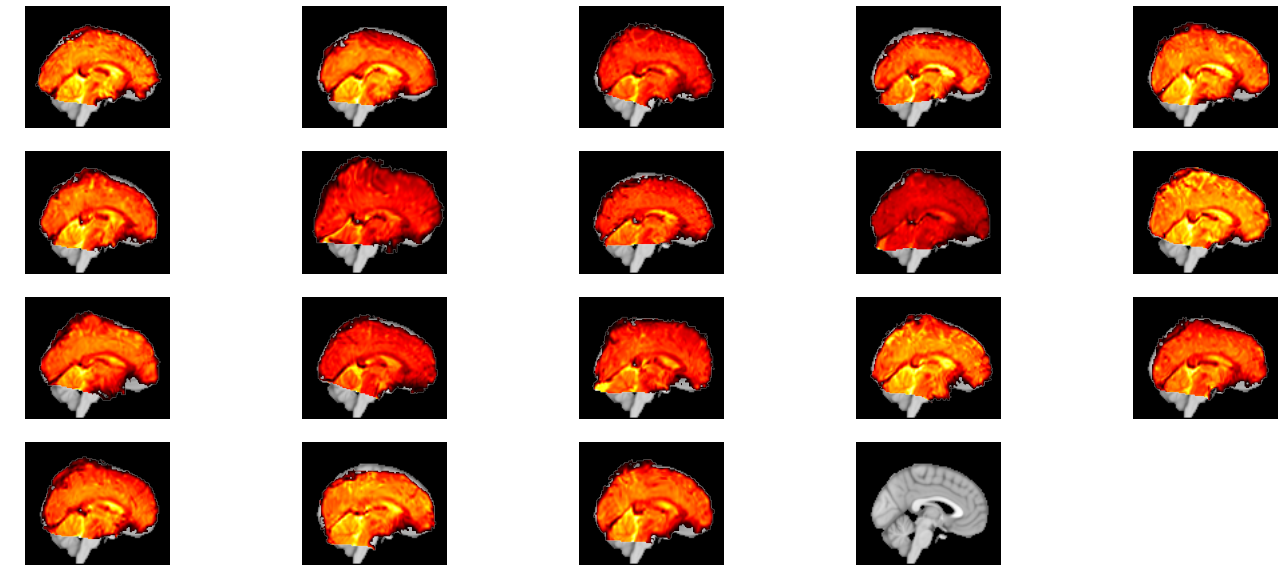

In [37]:
plt.figure(figsize=(24, 10))

for i, fn in enumerate(fns):
    im = nb.load(fn)
    d = np.ma.masked_less(im.get_data(), 1500)
    plt.subplot(4, 5, i+1)
    plt.imshow(mni[46, :, :].T, origin='lower', cmap=plt.cm.gray)
    plt.imshow(d[46, :, :].T, origin='lower', cmap=plt.cm.hot)
    plt.axis('off')
    
plt.subplot(4, 5, i+2)
plt.imshow(mni[46, :, :].T, origin='lower', cmap=plt.cm.gray)
plt.axis('off')

(-0.5, 108.5, -0.5, 90.5)

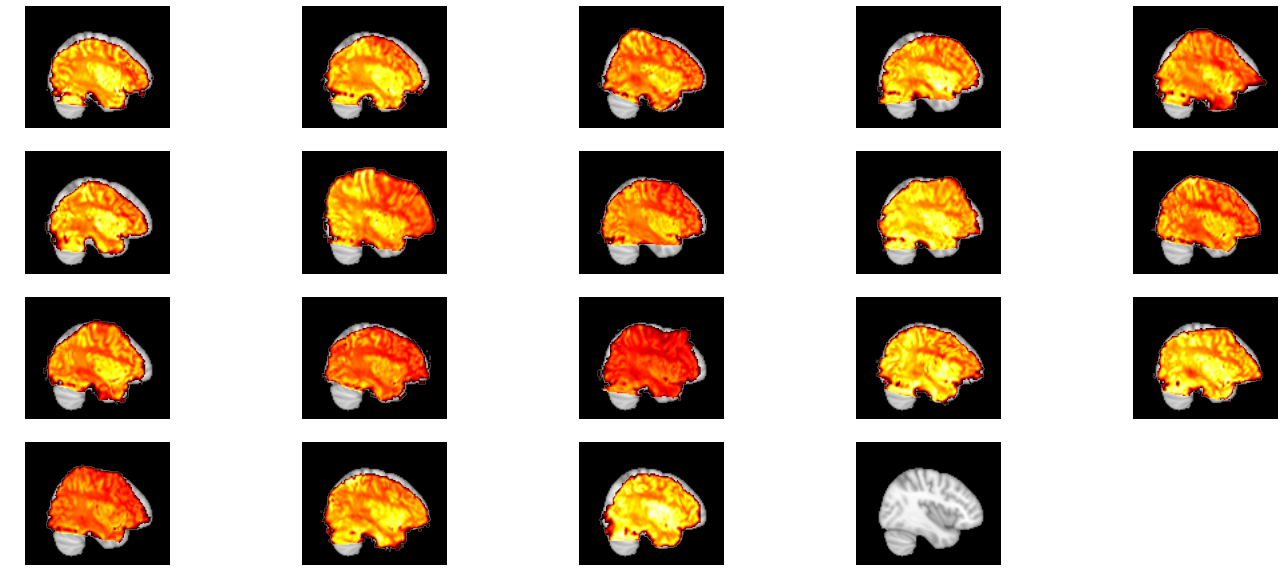

In [41]:
plt.figure(figsize=(24, 10))

for i, fn in enumerate(fns):
    im = nb.load(fn)
    d = np.ma.masked_less(im.get_data(), 1500)
    plt.subplot(4, 5, i+1)
    plt.imshow(mni[25, :, :].T, origin='lower', cmap=plt.cm.gray)
    plt.imshow(d[25, :, :].T, origin='lower', cmap=plt.cm.hot)
    plt.axis('off')
    
plt.subplot(4, 5, i+2)
plt.imshow(mni[25, :, :].T, origin='lower', cmap=plt.cm.gray)
plt.axis('off')

(-0.5, 90.5, -0.5, 108.5)

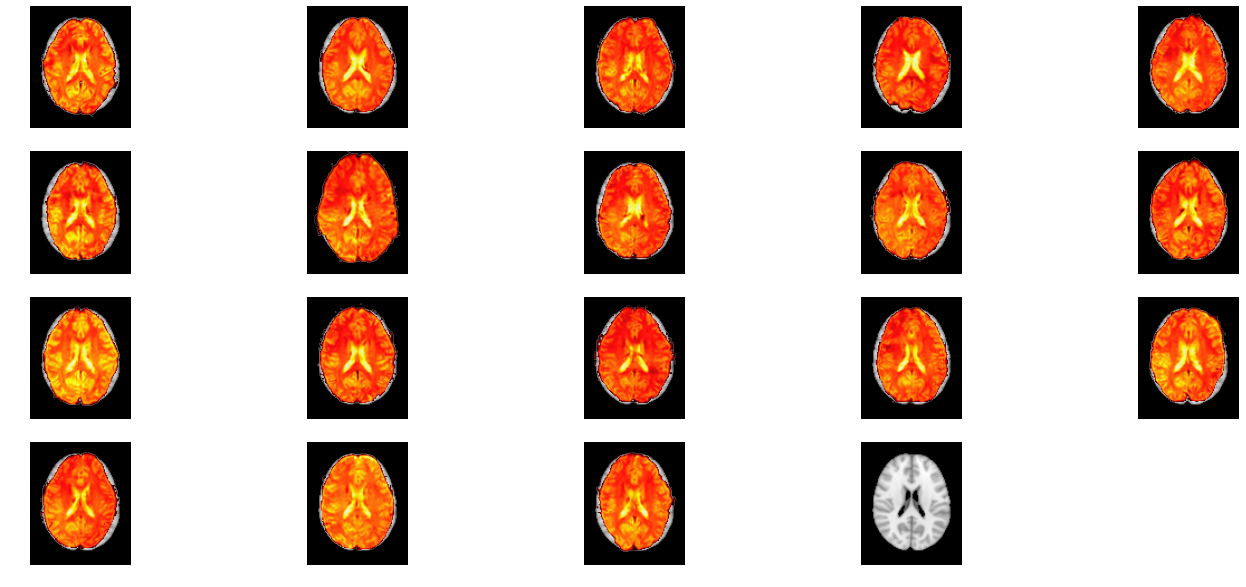

In [40]:
plt.figure(figsize=(24, 10))

for i, fn in enumerate(fns):
    im = nb.load(fn)
    d = np.ma.masked_less(im.get_data(), 1500)
    plt.subplot(4, 5, i+1)
    plt.imshow(mni[:, :, 46].T, origin='lower', cmap=plt.cm.gray)
    plt.imshow(d[:, :, 46].T, origin='lower', cmap=plt.cm.hot, alpha=.95)
    plt.axis('off')
    
plt.subplot(4, 5, i+2)
plt.imshow(mni[:, :, 46].T, origin='lower', cmap=plt.cm.gray)
plt.axis('off')

In [44]:
registration.get_node('anat2target_linear').inputs


angle_rep = <undefined>
apply_isoxfm = <undefined>
apply_xfm = <undefined>
args = <undefined>
bbrslope = <undefined>
bbrtype = <undefined>
bgvalue = <undefined>
bins = <undefined>
coarse_search = <undefined>
cost = <undefined>
cost_func = <undefined>
datatype = <undefined>
display_init = <undefined>
dof = <undefined>
echospacing = <undefined>
environ = {'FSLOUTPUTTYPE': 'NIFTI_GZ'}
fieldmap = <undefined>
fieldmapmask = <undefined>
fine_search = <undefined>
force_scaling = <undefined>
ignore_exception = False
in_file = <undefined>
in_matrix_file = <undefined>
in_weight = <undefined>
interp = <undefined>
min_sampling = <undefined>
no_clamp = <undefined>
no_resample = <undefined>
no_resample_blur = <undefined>
no_search = <undefined>
out_file = <undefined>
out_log = <undefined>
out_matrix_file = <undefined>
output_type = NIFTI_GZ
padding_size = <undefined>
pedir = <undefined>
ref_weight = <undefined>
reference = <undefined>
rigid2D = <undefined>
save_log = <undefined>
schedule = <undefin

In [46]:
fsl.FLIRT?